In [40]:
import env
import acquire
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
df = pd.read_sql(acquire.query, acquire.get_connection('zillow'))

In [3]:
df.head()

,id,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,censustractandblock,logerror,transactiondate,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,propertylandusedesc,storydesc,typeconstructiondesc
0,1727539,14297519,NaN,NaN,NaN,3.5,4.0,NaN,NaN,3.5,...,6.059063e+13,0.025595,2017-01-01,None,None,None,None,Single Family Residential,None,None
1,1387261,17052889,NaN,NaN,NaN,1.0,2.0,NaN,NaN,1.0,...,6.111001e+13,0.055619,2017-01-01,None,None,None,None,Single Family Residential,None,None
2,11677,14186244,NaN,NaN,NaN,2.0,3.0,NaN,NaN,2.0,...,6.059022e+13,0.005383,2017-01-01,None,None,None,None,Single Family Residential,None,None
3,2288172,12177905,NaN,NaN,NaN,3.0,4.0,NaN,8.0,3.0,...,6.037300e+13,-0.103410,2017-01-01,None,None,None,Central,Single Family Residential,None,None
4,1970746,10887214,1.0,NaN,NaN,3.0,3.0,NaN,8.0,3.0,...,6.037124e+13,0.006940,2017-01-01,Central,None,None,Central,Condominium,None,None


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77380 entries, 0 to 77379
Data columns (total 68 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            77380 non-null  int64  
 1   parcelid                      77380 non-null  int64  
 2   airconditioningtypeid         24953 non-null  float64
 3   architecturalstyletypeid      206 non-null    float64
 4   basementsqft                  50 non-null     float64
 5   bathroomcnt                   77380 non-null  float64
 6   bedroomcnt                    77380 non-null  float64
 7   buildingclasstypeid           15 non-null     float64
 8   buildingqualitytypeid         49671 non-null  float64
 9   calculatedbathnbr             76771 non-null  float64
 10  decktypeid                    614 non-null    float64
 11  finishedfloor1squarefeet      6023 non-null   float64
 12  calculatedfinishedsquarefeet  77184 non-null  float64
 13  f

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,77380.0,1.495126e+06,8.609057e+05,3.490000e+02,7.520500e+05,1.497870e+06,2.240480e+06,2.982274e+06
parcelid,77380.0,1.300715e+07,3.481368e+06,1.071186e+07,1.153830e+07,1.253155e+07,1.421184e+07,1.676893e+08
airconditioningtypeid,24953.0,1.813289e+00,2.967894e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.300000e+01
architecturalstyletypeid,206.0,7.388350e+00,2.734542e+00,2.000000e+00,7.000000e+00,7.000000e+00,7.000000e+00,2.100000e+01
basementsqft,50.0,6.797200e+02,6.897035e+02,3.800000e+01,2.730000e+02,5.150000e+02,7.965000e+02,3.560000e+03
bathroomcnt,77380.0,2.299134e+00,9.966566e-01,0.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,1.800000e+01
bedroomcnt,77380.0,3.053489e+00,1.139103e+00,0.000000e+00,2.000000e+00,3.000000e+00,4.000000e+00,1.600000e+01
buildingclasstypeid,15.0,3.933333e+00,2.581989e-01,3.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00
buildingqualitytypeid,49671.0,6.534638e+00,1.721933e+00,1.000000e+00,6.000000e+00,6.000000e+00,8.000000e+00,1.200000e+01
calculatedbathnbr,76771.0,2.316871e+00,9.797606e-01,1.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,1.800000e+01


In [6]:
df.isnull().sum()

id                              0
parcelid                        0
airconditioningtypeid       52427
architecturalstyletypeid    77174
basementsqft                77330
                            ...  
buildingclassdesc           77365
heatingorsystemdesc         27941
propertylandusedesc             0
storydesc                   77330
typeconstructiondesc        77158
Length: 68, dtype: int64

In [7]:
df.isnull().sum(axis=1)

0        36
1        33
2        34
3        32
4        29
         ..
77375    29
77376    33
77377    32
77378    32
77379    34
Length: 77380, dtype: int64

In [8]:
def nulls_by_row(df):
    num_missing = df.isnull().sum(axis=1)
    prnt_miss = num_missing / df.shape[1] * 100
    rows_missing = pd.DataFrame(
        {'num_cols_missing': num_missing, 
        'percent_cols_missing': prnt_miss})\
    .reset_index()\
    .groupby(['num_cols_missing', 'percent_cols_missing']).\
    count().reset_index().rename(
        columns={
            'customer_id': 'count'})
    return rows_missing

In [9]:
nulls_by_row(df)

,num_cols_missing,percent_cols_missing,index
0,23,33.823529,2
1,24,35.294118,13
2,25,36.764706,24
3,26,38.235294,65
4,27,39.705882,316
5,28,41.176471,455
6,29,42.647059,5270
7,30,44.117647,3455
8,31,45.588235,9891
9,32,47.058824,12579


In [10]:
def nulls_by_col(df):
    num_missing = df.isnull().sum()
    percnt_miss = num_missing / df.shape[0] * 100
    cols_missing = pd.DataFrame(
    {
        'num_rows_missing': num_missing,
        'percent_rows_missing': percnt_miss
    })
    return  cols_missing

In [11]:
nulls_by_col(df)

,num_rows_missing,percent_rows_missing
id,0,0.000000
parcelid,0,0.000000
airconditioningtypeid,52427,67.752649
architecturalstyletypeid,77174,99.733781
basementsqft,77330,99.935384
...,...,...
buildingclassdesc,77365,99.980615
heatingorsystemdesc,27941,36.108814
propertylandusedesc,0,0.000000
storydesc,77330,99.935384


In [12]:
def summarize(df):
    print('DataFrame head: \n')
    print(df.head())
    print('----------')
    print('DataFrame info: \n')
    print(df.info())
    print('----------')
    print('Dataframe Description: \n')
    print(df.describe())
    print('----------')
    print('Null value assessments: \n')
    print('nulls by column: ', nulls_by_col(df))
    print('--')
    print('nulls by row: ', nulls_by_row(df))
    numerical_cols = [col for col in df.columns if df[col].dtype != 'O']
    categorical_cols = [col for col in df.columns if col not in numerical_cols ]
    print('--------')
    print('value_counts: \n')
    for col in df.columns:
        print('Column Name: ', col)
        if col in categorical_cols:
            print(df[col].value_counts())
        else:
            print(df[col].value_counts(bins=10, sort=False))
        print('--')
    print('---------')
    print('Report Finished')

In [13]:
summarize(df)

DataFrame head: 

        id  parcelid  airconditioningtypeid  architecturalstyletypeid  \
0  1727539  14297519                    NaN                       NaN   
1  1387261  17052889                    NaN                       NaN   
2    11677  14186244                    NaN                       NaN   
3  2288172  12177905                    NaN                       NaN   
4  1970746  10887214                    1.0                       NaN   

   basementsqft  bathroomcnt  bedroomcnt  buildingclasstypeid  \
0           NaN          3.5         4.0                  NaN   
1           NaN          1.0         2.0                  NaN   
2           NaN          2.0         3.0                  NaN   
3           NaN          3.0         4.0                  NaN   
4           NaN          3.0         3.0                  NaN   

   buildingqualitytypeid  calculatedbathnbr  ...  censustractandblock  \
0                    NaN                3.5  ...         6.059063e+13   
1     

In [14]:
def handle_missing_values(df, 
                          prop_required_columns=0.5, 
                          prop_required_row=0.75):
    threshold = int(round(prop_required_columns * len(df.index), 0))
    df = df.dropna(axis=1, thresh=threshold)
    threshold = int(round(prop_required_row * len(df.columns), 0))
    df = df.dropna(axis=0, thresh=threshold)
    return df

In [15]:
df= handle_missing_values(df)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77184 entries, 0 to 77379
Data columns (total 34 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            77184 non-null  int64  
 1   parcelid                      77184 non-null  int64  
 2   bathroomcnt                   77184 non-null  float64
 3   bedroomcnt                    77184 non-null  float64
 4   buildingqualitytypeid         49670 non-null  float64
 5   calculatedbathnbr             76767 non-null  float64
 6   calculatedfinishedsquarefeet  77170 non-null  float64
 7   finishedsquarefeet12          73744 non-null  float64
 8   fips                          77184 non-null  float64
 9   fullbathcnt                   76767 non-null  float64
 10  heatingorsystemtypeid         49439 non-null  float64
 11  latitude                      77184 non-null  float64
 12  longitude                     77184 non-null  float64
 13  l

In [17]:
df['fips'].value_counts()

6037.0    50491
6059.0    20490
6111.0     6203
Name: fips, dtype: int64

In [18]:
county_dict = {6037.0: 'LA County', 6059.0: 'Orange County',
               6111.0: 'Ventura County'}

In [19]:
df['fips'].replace(county_dict, inplace=True)
df.rename(columns={'fips': 'county'}, inplace=True)

df.head()


,id,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,county,fullbathcnt,...,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror,transactiondate,heatingorsystemdesc,propertylandusedesc
0,1727539,14297519,3.5,4.0,NaN,3.5,3100.0,3100.0,Orange County,3.0,...,485713.0,1023282.0,2016.0,537569.0,11013.72,6.059063e+13,0.025595,2017-01-01,None,Single Family Residential
1,1387261,17052889,1.0,2.0,NaN,1.0,1465.0,1465.0,Ventura County,1.0,...,88000.0,464000.0,2016.0,376000.0,5672.48,6.111001e+13,0.055619,2017-01-01,None,Single Family Residential
2,11677,14186244,2.0,3.0,NaN,2.0,1243.0,1243.0,Orange County,2.0,...,85289.0,564778.0,2016.0,479489.0,6488.30,6.059022e+13,0.005383,2017-01-01,None,Single Family Residential
3,2288172,12177905,3.0,4.0,8.0,3.0,2376.0,2376.0,LA County,3.0,...,108918.0,145143.0,2016.0,36225.0,1777.51,6.037300e+13,-0.103410,2017-01-01,Central,Single Family Residential
4,1970746,10887214,3.0,3.0,8.0,3.0,1312.0,1312.0,LA County,3.0,...,73681.0,119407.0,2016.0,45726.0,1533.89,6.037124e+13,0.006940,2017-01-01,Central,Condominium


In [20]:
df.head().T

,0,1,2,3,4
id,1727539,1387261,11677,2288172,1970746
parcelid,14297519,17052889,14186244,12177905,10887214
bathroomcnt,3.5,1.0,2.0,3.0,3.0
bedroomcnt,4.0,2.0,3.0,4.0,3.0
buildingqualitytypeid,NaN,NaN,NaN,8.0,8.0
calculatedbathnbr,3.5,1.0,2.0,3.0,3.0
calculatedfinishedsquarefeet,3100.0,1465.0,1243.0,2376.0,1312.0
finishedsquarefeet12,3100.0,1465.0,1243.0,2376.0,1312.0
county,Orange County,Ventura County,Orange County,LA County,LA County
fullbathcnt,3.0,1.0,2.0,3.0,3.0


In [22]:
df.isnull().sum()

id                                  0
parcelid                            0
bathroomcnt                         0
bedroomcnt                          0
buildingqualitytypeid           27514
calculatedbathnbr                 417
calculatedfinishedsquarefeet       14
finishedsquarefeet12             3440
county                              0
fullbathcnt                       417
heatingorsystemtypeid           27745
latitude                            0
longitude                           0
lotsizesquarefeet                8157
propertycountylandusecode           0
propertylandusetypeid               0
propertyzoningdesc              26912
rawcensustractandblock              0
regionidcity                     1454
regionidcounty                      0
regionidzip                        41
roomcnt                             0
unitcnt                         26622
yearbuilt                          83
structuretaxvaluedollarcnt         85
taxvaluedollarcnt                   1
assessmentye

In [23]:
(df.isnull().sum()/df.shape[0]*100)

id                               0.000000
parcelid                         0.000000
bathroomcnt                      0.000000
bedroomcnt                       0.000000
buildingqualitytypeid           35.647284
calculatedbathnbr                0.540267
calculatedfinishedsquarefeet     0.018138
finishedsquarefeet12             4.456882
county                           0.000000
fullbathcnt                      0.540267
heatingorsystemtypeid           35.946569
latitude                         0.000000
longitude                        0.000000
lotsizesquarefeet               10.568252
propertycountylandusecode        0.000000
propertylandusetypeid            0.000000
propertyzoningdesc              34.867330
rawcensustractandblock           0.000000
regionidcity                     1.883810
regionidcounty                   0.000000
regionidzip                      0.053120
roomcnt                          0.000000
unitcnt                         34.491604
yearbuilt                        0

### what is the distibution of the log error accross the counties?

Variance of logerror for LA County.
0.026398407638158147
Variance of logerror for Orange County.
0.036080061233119964
Variance of logerror for Ventura County.
0.022814242378564963


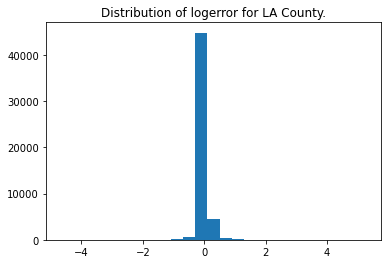

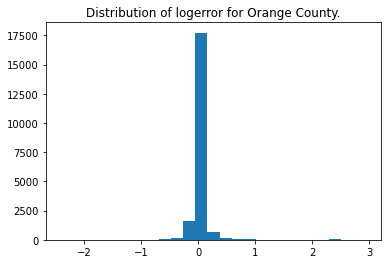

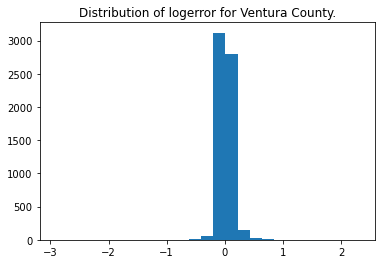

In [47]:
county_list = ['LA County', 'Orange County', 'Ventura County']

for county in county_list:
    print('Variance of logerror for {}.'.format(county))
    print(df[df['county'] == county].logerror.var())
    plt.figure()
    plt.title('Distribution of logerror for {}.'.format(county))
    plt.hist(df[df['county'] == county].logerror, bins=25)

511389.85159919097

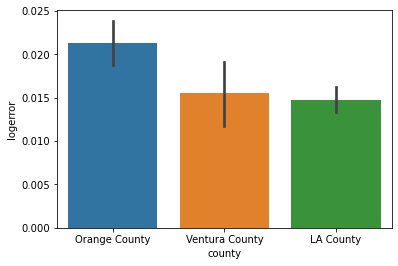

In [49]:
sns.barplot(x='county', y='logerror', data=df)
plt.show()

## Hypothesis testing:

HO: there is no difference between the means of the logerror between counties
Ha: there is a difference between the means of the logerror between counties

In [33]:
# ANOVA test to see if there is a difference in the means of the logerror
f_county, p_county = stats.f_oneway(df[df['county'] == 'LA County'].logerror,
                                    df[df['county'] == 'Orange County'].logerror,
                                    df[df['county'] == 'Ventura County'].logerror)

f_county, p_county

(11.049627334869657, 1.5918227597880967e-05)

In [34]:
df['age'] = 2017 - df['yearbuilt']

In [36]:
df.head().T

,0,1,2,3,4
id,1727539,1387261,11677,2288172,1970746
parcelid,14297519,17052889,14186244,12177905,10887214
bathroomcnt,3.5,1.0,2.0,3.0,3.0
bedroomcnt,4.0,2.0,3.0,4.0,3.0
buildingqualitytypeid,NaN,NaN,NaN,8.0,8.0
calculatedbathnbr,3.5,1.0,2.0,3.0,3.0
calculatedfinishedsquarefeet,3100.0,1465.0,1243.0,2376.0,1312.0
finishedsquarefeet12,3100.0,1465.0,1243.0,2376.0,1312.0
county,Orange County,Ventura County,Orange County,LA County,LA County
fullbathcnt,3.0,1.0,2.0,3.0,3.0


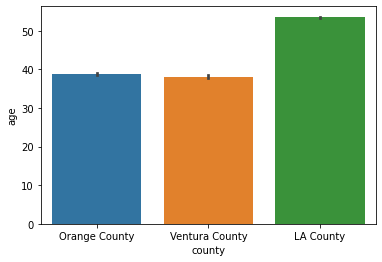

In [44]:
sns.barplot(x='county', y='age', data=df)
plt.show()

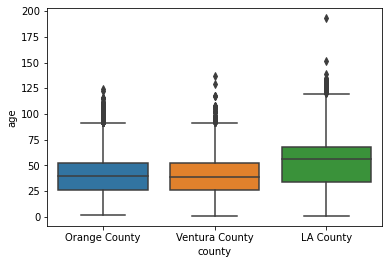

In [42]:
sns.boxplot(x='county', y='age', data=df)
plt.show()

HO: There is no difference between the LA county's mean age and the overall population mean
Ha: There is a difference between LA county's mean house age and the overall age of the houses

In [63]:
#Test the average age of a home in LA County against the overall mean
t_age, p_age = stats.ttest_1samp(df[df['county'] == 'LA County'].age,
                                 df['age'].mean(), nan_policy='omit')

t_age, p_age

(46.0751169764284, 0.0)

In [53]:
df.age.mean()

48.36347129090414

In [55]:
df[df['county'] == 'LA County'].age.mean()

53.47615082669204

In [58]:
t_age2, p_age2 = stats.ttest_1samp(df[df['county'] == 'LA County'].age.mean(),
                                 df['age'].mean())

t_age2, p_age2

(nan, nan)

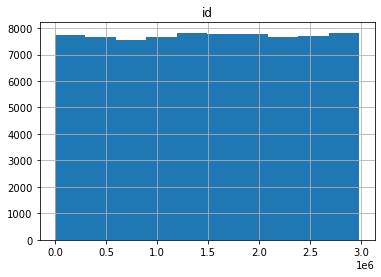

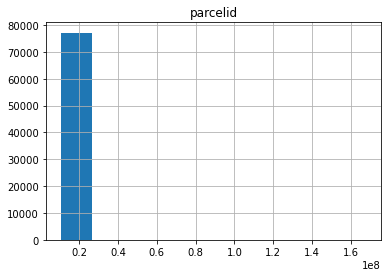

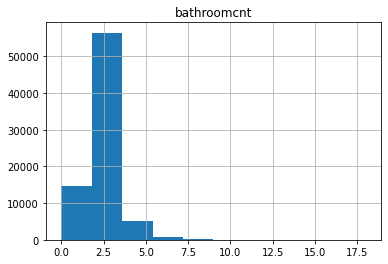

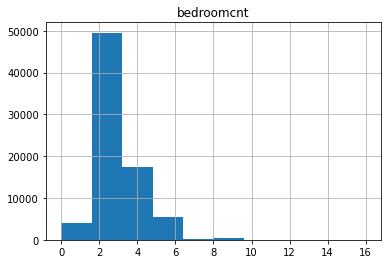

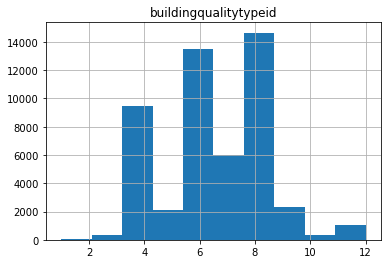

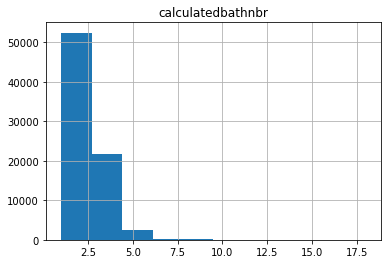

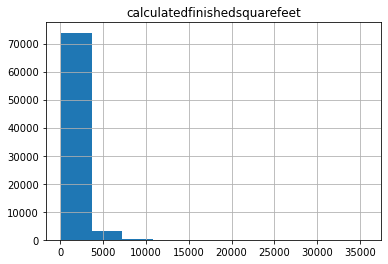

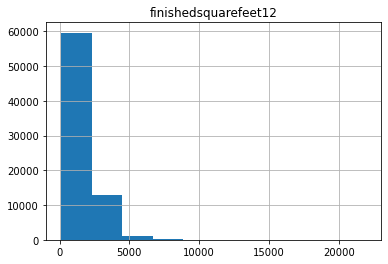

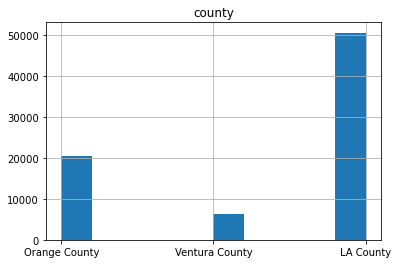

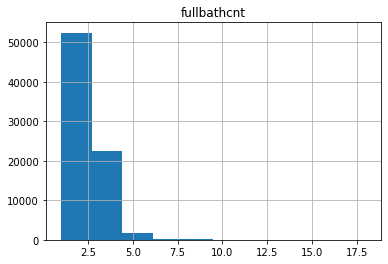

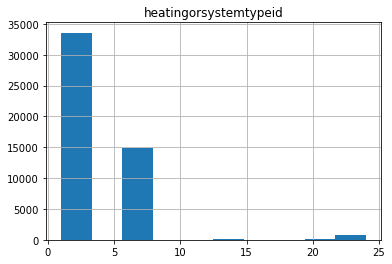

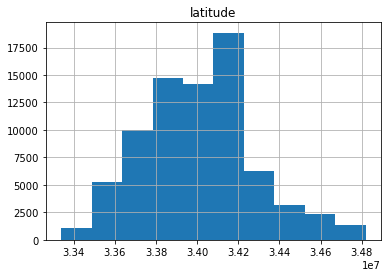

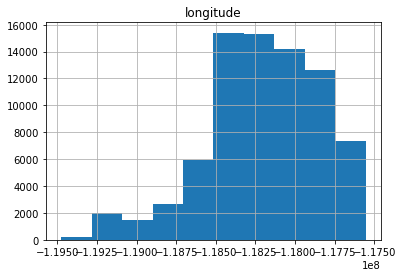

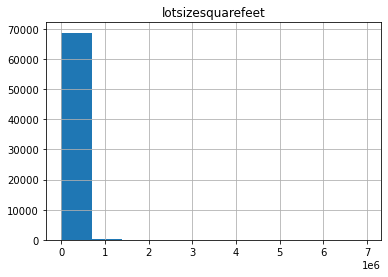

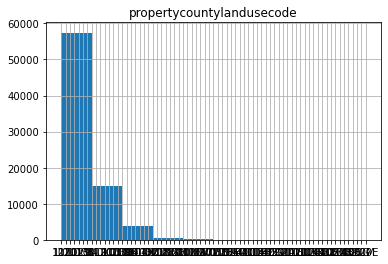

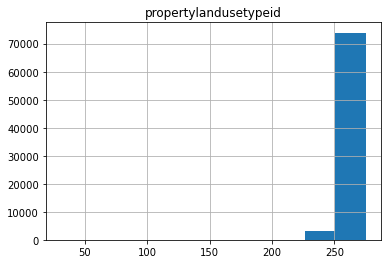

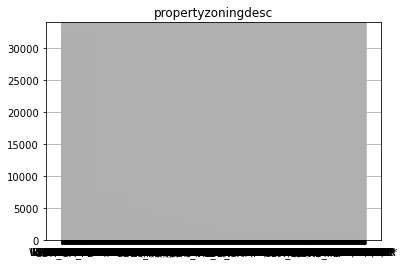

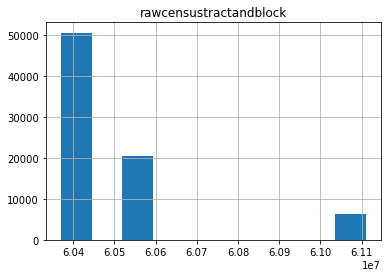

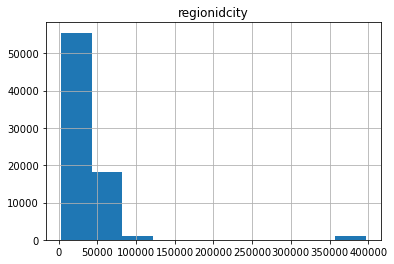

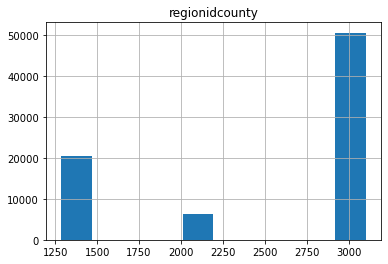

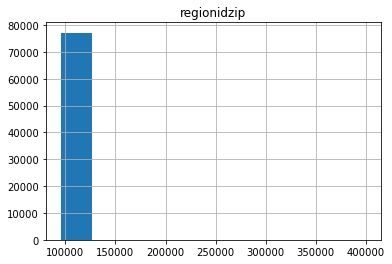

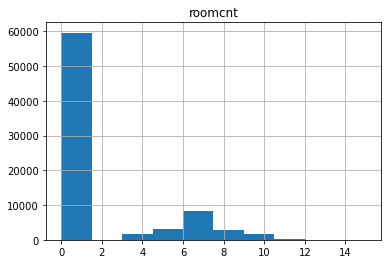

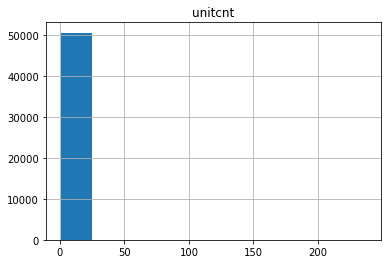

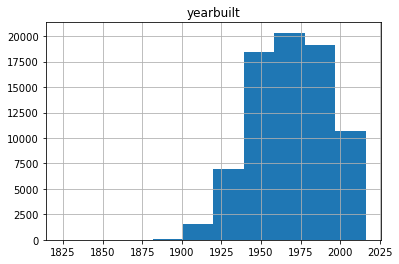

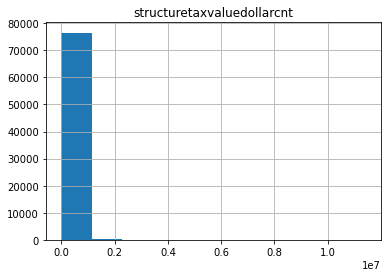

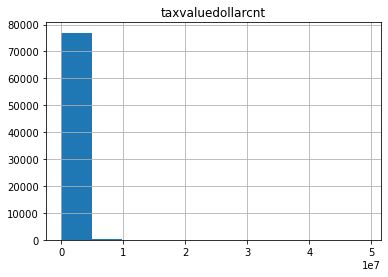

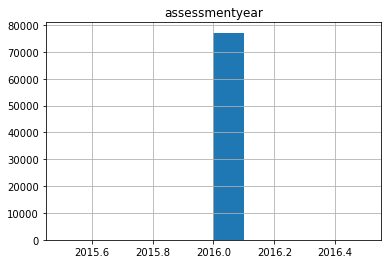

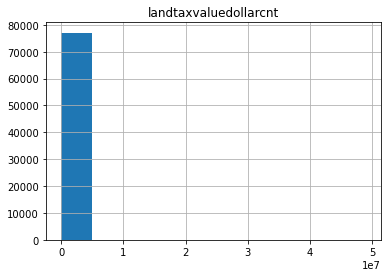

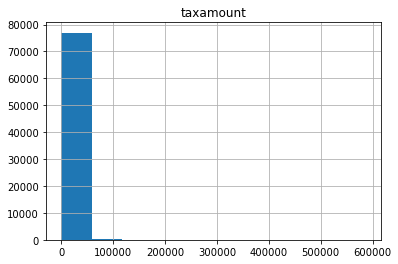

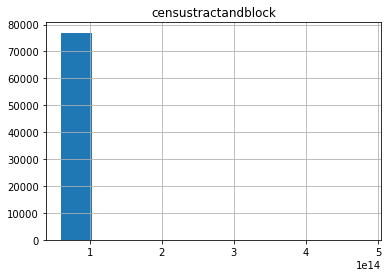

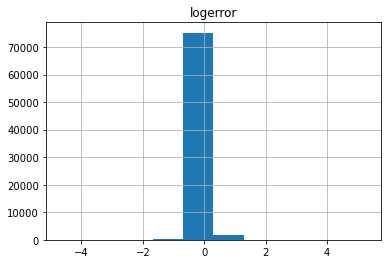

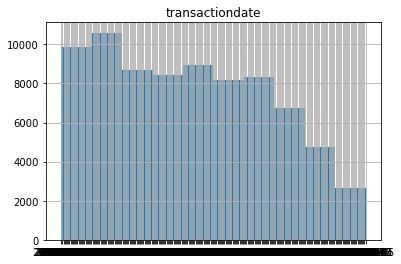

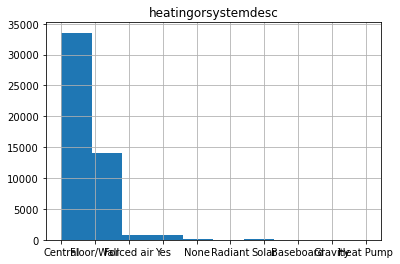

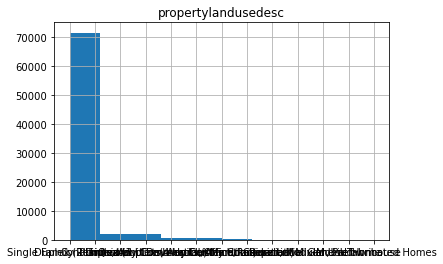

In [59]:
for col in df.columns[:-1]:
    df[col].hist()
    plt.title(col)
    plt.show()
